In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
from scipy.stats import kruskal
import scikit_posthocs as sp

In [2]:
#path = Path('../../data/results/exp2/sphere')
frequency=1000
frequencynoNN=1150
nn_window=5
path_in = Path('../../data/results/exp2/rosenbrock')
path = path_in / f'freq{frequency}nn_w{nn_window}nn_p{3}'


In [3]:
#Experiment = Enum('Experiment', 'exp1 exp2 exp3 exp4')
#Method = Enum('Methods', 'noNNRestart noNNReval NNnorm NNdrop')
#Mechname:Random, Worst, Closest
# fitness plots
noNNReval = pd.read_csv(path_in/ f'freq{frequencynoNN}nn_w{nn_window}nn_p{3}'/'noNNReval_mof.csv')
#noNNRestart= pd.read_csv(path/'noNNRestart_mof.csv')

#NNnorm_Random= pd.read_csv(path/'NNnorm_Worst_mof.csv')
#NNdrop_Random = pd.read_csv(path/'NNdrop_Worst_mof.csv')


NNnorm_Worst= pd.read_csv(path/'NNnorm_Worst_mof.csv')
NNdrop_Worst = pd.read_csv(path/'NNdrop_Worst_mof.csv')


#NNnorm_Closest= pd.read_csv(path/'NNnorm_Closest_mof.csv')
#NNdrop_Closest = pd.read_csv(path/'NNdrop_Closest_mof.csv')
#labels = ['noNNReval', 'NNnorm_Random', 'NNnorm_Worst','NNnorm_Closest','NNdrop_Random', 'NNdrop_Worst', 'NNdrop_Closest']
labels = ['noNNReval', 'NNnorm_Worst', 'NNdrop_Worst']
#x=np.array([noNNReval.mof, NNnorm_Random.mof, NNnorm_Worst.mof, NNnorm_Closest.mof, NNdrop_Random.mof,NNdrop_Worst.mof,NNdrop_Closest.mof])
x=np.array([noNNReval.mof, NNnorm_Worst.mof,NNdrop_Worst.mof])
#stat, p = kruskal(noNNReval, NNnorm_Random,NNnorm_Worst,NNnorm_Closest, NNdrop_Random,NNdrop_Worst ,NNdrop_Closest)
stat, p = kruskal(noNNReval,NNnorm_Worst,NNdrop_Worst)


    
    
pc = sp.posthoc_conover(x, p_adjust='holm', val_col='values', group_col='groups')
pc.columns = labels
pc.index = labels
print('Statistics=%.3f, p=%.3f' % (stat, p))
display(pc)

Statistics=35.461, p=0.000


,noNNReval,NNnorm_Worst,NNdrop_Worst
noNNReval,-1.000000e+00,5.670585e-12,3.361769e-08
NNnorm_Worst,5.670585e-12,-1.000000e+00,2.063139e-02
NNdrop_Worst,3.361769e-08,2.063139e-02,-1.000000e+00


/Users/maryam/anaconda3/envs/denn/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


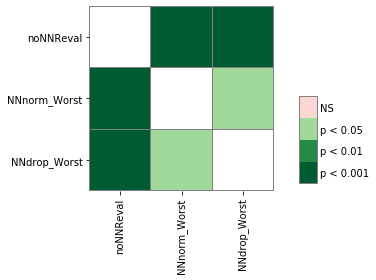

In [4]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True,
                'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
ax,cbar = sp.sign_plot(pc, **heatmap_args)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_yticklabels(labels, rotation='horizontal')
plt.tight_layout()
#plt.savefig(path/'KrusKal-Wallis.eps')